In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy 

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [6]:
import requests
from config import weather_api_key

In [7]:
# Create an endpoint URL for a city.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 11.57,
  'feels_like': 3.07,
  'temp_min': 8.83,
  'temp_max': 13.48,
  'pressure': 1000,
  'humidity': 82},
 'visibility': 9656,
 'wind': {'speed': 5.01, 'deg': 319, 'gust': 27},
 'clouds': {'all': 100},
 'dt': 1643520294,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643543992,
  'sunset': 1643579703},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [8]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["sys"]["country"]

'US'

In [9]:
boston_data["dt"]

1643520294

In [12]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 13.48 82 100 5.01


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-01-30 05:24:54'

In [14]:
# Import the time library
import time

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [18]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 38 of Set 12 | vaini
Processing Record 39 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 40 of Set 12 | port elizabeth
Processing Record 41 of Set 12 | robertson
Processing Record 42 of Set 12 | erdenet
Processing Record 43 of Set 12 | punta arenas
Processing Record 44 of Set 12 | north bend
Processing Record 45 of Set 12 | georgetown
Processing Record 46 of Set 12 | tongchuan
Processing Record 47 of Set 12 | iqaluit
Processing Record 48 of Set 12 | hermanus
Processing Record 49 of Set 12 | albany
Processing Record 50 of Set 12 | araouane
Processing Record 51 of Set 12 | fairbanks
Processing Record 52 of Set 12 | bluff
Processing Record 53 of Set 12 | qaanaaq
Processing Record 54 of Set 12 | sokolo
Processing Record 55 of Set 12 | kolosovka
Processing Record 56 of Set 12 | nome
Processing Record 57 of Set 12 | saskylakh
Processing Record 58 of Set 12 | ushuaia
Processing Record 59 of Set 12 | mollendo
Processing Record 60 of Set 12 | tezu
Processi

Processing Record 37 of Set 15 | boyolangu
Processing Record 38 of Set 15 | nikolskoye
Processing Record 39 of Set 15 | tasiilaq
Processing Record 40 of Set 15 | buchanan
Processing Record 41 of Set 15 | havre-saint-pierre
Processing Record 42 of Set 15 | changping
Processing Record 43 of Set 15 | cidreira
Processing Record 44 of Set 15 | joshimath
Processing Record 45 of Set 15 | burnie
Processing Record 46 of Set 15 | stokmarknes
Processing Record 47 of Set 15 | lora del rio
Processing Record 48 of Set 15 | sentyabrskiy
City not found. Skipping...
Processing Record 49 of Set 15 | zhigansk
Processing Record 50 of Set 15 | santa fe
Processing Record 1 of Set 16 | santa cruz
Processing Record 2 of Set 16 | cap malheureux
Processing Record 3 of Set 16 | portland
Processing Record 4 of Set 16 | aflu
City not found. Skipping...
Processing Record 5 of Set 16 | manokwari
Processing Record 6 of Set 16 | nishihara
Processing Record 7 of Set 16 | pacific grove
Processing Record 8 of Set 16 | ja

Processing Record 21 of Set 19 | isla vista
Processing Record 22 of Set 19 | hauterive
Processing Record 23 of Set 19 | honiara
Processing Record 24 of Set 19 | hofn
Processing Record 25 of Set 19 | goundam
Processing Record 26 of Set 19 | tuatapere
Processing Record 27 of Set 19 | kjollefjord
Processing Record 28 of Set 19 | yarada
Processing Record 29 of Set 19 | ust-kamchatsk
City not found. Skipping...
Processing Record 30 of Set 19 | turkistan
Processing Record 31 of Set 19 | old town
Processing Record 32 of Set 19 | marsh harbour
Processing Record 33 of Set 19 | punta alta
Processing Record 34 of Set 19 | chaoyang
Processing Record 35 of Set 19 | torbay
Processing Record 36 of Set 19 | getulio vargas
Processing Record 37 of Set 19 | emba
Processing Record 38 of Set 19 | mondlo
Processing Record 39 of Set 19 | maur
Processing Record 40 of Set 19 | havoysund
Processing Record 41 of Set 19 | hamilton
Processing Record 42 of Set 19 | dingle
Processing Record 43 of Set 19 | leningrads

Processing Record 4 of Set 23 | grand baie
Processing Record 5 of Set 23 | broome
Processing Record 6 of Set 23 | zolnoye
City not found. Skipping...
Processing Record 7 of Set 23 | gimli
Processing Record 8 of Set 23 | pathein
Processing Record 9 of Set 23 | okato
Processing Record 10 of Set 23 | saint-michel-des-saints
Processing Record 11 of Set 23 | rovaniemi
Processing Record 12 of Set 23 | kjopsvik
Processing Record 13 of Set 23 | aginskoye
Processing Record 14 of Set 23 | saldanha
Processing Record 15 of Set 23 | waingapu
Processing Record 16 of Set 23 | amalapuram
Processing Record 17 of Set 23 | simao
Processing Record 18 of Set 23 | san cristobal
Processing Record 19 of Set 23 | cururupu
Processing Record 20 of Set 23 | niono
Processing Record 21 of Set 23 | bronnoysund
Processing Record 22 of Set 23 | fenoarivo
Processing Record 23 of Set 23 | villa maria
Processing Record 24 of Set 23 | xadani
City not found. Skipping...
Processing Record 25 of Set 23 | ucluelet
Processing 

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,81.45,77,95,12.71,TO,2022-01-30 06:25:59
1,Port Elizabeth,-33.9180,25.5701,72.10,78,0,4.61,ZA,2022-01-30 06:26:00
2,Robertson,36.5167,-86.8667,31.77,55,100,6.91,US,2022-01-30 06:26:00
3,Erdenet,49.0333,104.0833,4.50,81,45,3.94,MN,2022-01-30 06:26:00
4,Punta Arenas,-53.1500,-70.9167,44.71,70,0,13.80,CL,2022-01-30 06:22:47
5,North Bend,43.4065,-124.2243,46.13,98,75,4.61,US,2022-01-30 06:26:00
6,Georgetown,5.4112,100.3354,93.13,67,20,1.01,MY,2022-01-30 06:24:29
7,Tongchuan,35.0806,109.0897,35.91,68,19,1.48,CN,2022-01-30 06:26:01
8,Iqaluit,63.7506,-68.5145,-15.07,70,20,3.44,CA,2022-01-30 06:26:01
9,Hermanus,-34.4187,19.2345,71.91,77,14,13.29,ZA,2022-01-30 06:26:01


In [21]:
# reset the order
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2022-01-30 06:25:59,-21.2000,-175.2000,81.45,77,95,12.71
1,Port Elizabeth,ZA,2022-01-30 06:26:00,-33.9180,25.5701,72.10,78,0,4.61
2,Robertson,US,2022-01-30 06:26:00,36.5167,-86.8667,31.77,55,100,6.91
3,Erdenet,MN,2022-01-30 06:26:00,49.0333,104.0833,4.50,81,45,3.94
4,Punta Arenas,CL,2022-01-30 06:22:47,-53.1500,-70.9167,44.71,70,0,13.80
5,North Bend,US,2022-01-30 06:26:00,43.4065,-124.2243,46.13,98,75,4.61
6,Georgetown,MY,2022-01-30 06:24:29,5.4112,100.3354,93.13,67,20,1.01
7,Tongchuan,CN,2022-01-30 06:26:01,35.0806,109.0897,35.91,68,19,1.48
8,Iqaluit,CA,2022-01-30 06:26:01,63.7506,-68.5145,-15.07,70,20,3.44
9,Hermanus,ZA,2022-01-30 06:26:01,-34.4187,19.2345,71.91,77,14,13.29


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

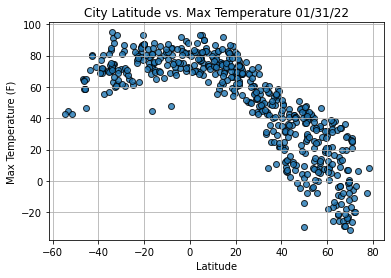

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(
    lats,
    max_temps,
    edgecolor = "black",
    linewidth = 1,
    marker = "o",
    alpha = 0.8,
    label = "cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

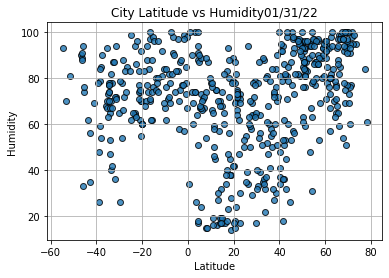

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(
    lats,
    humidity,
    edgecolor = "black",
    linewidth = 1,
    alpha = 0.8,
    marker = "o",
    label = "Cities")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs Humidity" + time.strftime("%x"))
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

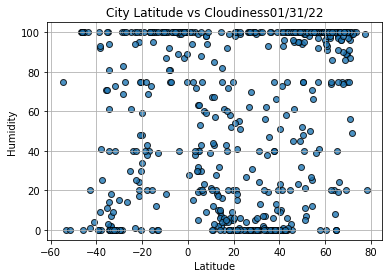

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(
    lats,
    cloudiness,
    edgecolor = "black",
    linewidth = 1,
    alpha = 0.8,
    marker = "o",
    label = "Cities")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"City Latitude vs Cloudiness" + time.strftime("%x"))
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

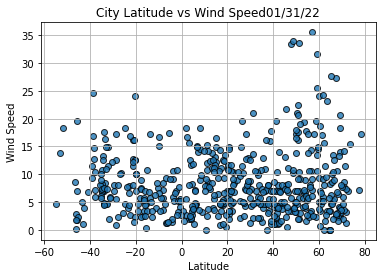

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(
    lats,
    wind_speed,
    edgecolor = "black",
    linewidth = 1,
    alpha = 0.8,
    marker = "o",
    label = "Cities")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs Wind Speed" + time.strftime("%x"))
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [95]:
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates,text_coordinates2):
    # Run regression on hemisphere weather data.
    (slope,intercept,r_value,p_value,stderr) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = slope*x_values + intercept
    # Get the equation of the line.
    line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, color = "red", fontsize = 15)
    plt.annotate(r_value,text_coordinates2,color="red",fontsize = 15)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [96]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"])<0]

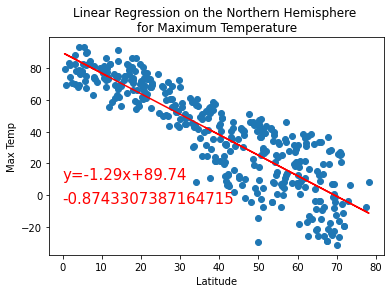

In [117]:
# Linear regression on the Northern Hemisphere vs Max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere \nfor Maximum Temperature","Max Temp",(0,10),(0,-5))

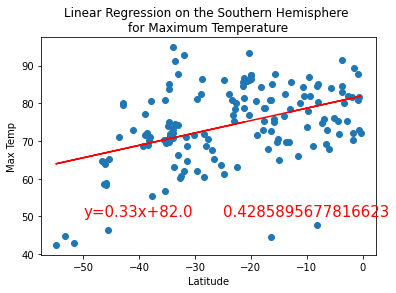

In [116]:
# Linear regression on the Southern Hemisphere vs Max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature',"Max Temp",(-50,50),(-25,50))

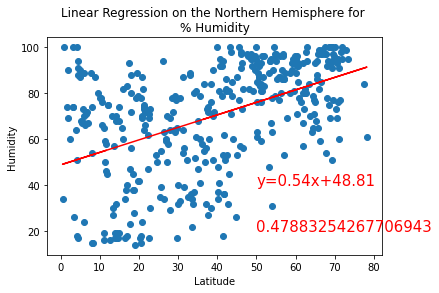

In [115]:
# Linear regression on the Northern Hemisphere vs Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,y_values,"Linear Regression on the Northern Hemisphere for \n% Humidity","Humidity",(50,40),(50,20))

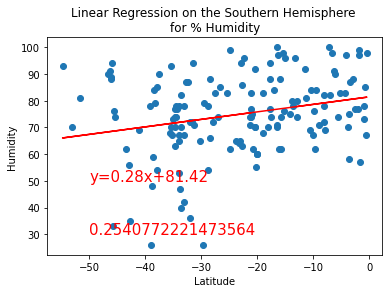

In [114]:
# Linear regression on the Southern Hemisphere vs Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \nfor % Humidity","Humidity",(-50,50),(-50,30))

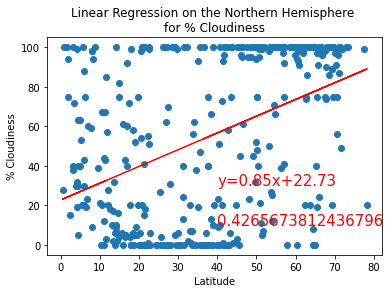

In [113]:
# Linear regression on the Northern Hemisphere vs cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,30),(40,10))

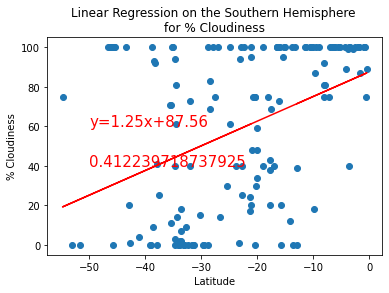

In [110]:
# Linear regression on the Southern Hemisphere vs cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60),(-50,40))

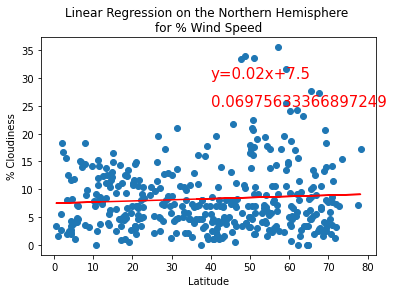

In [119]:
# Linear regression on the Northern Hemisphere vs wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Wind Speed', '% Cloudiness',(40,30),(40,25))

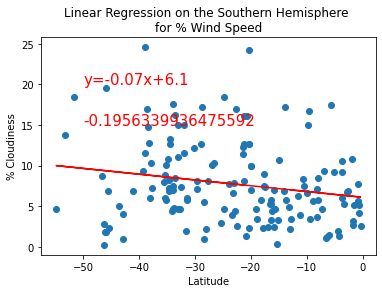

In [121]:
# Linear regression on the Southern Hemisphere vs wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Wind Speed', '% Cloudiness',(-50,20),(-50,15))